In [ ]:
import pandas as pd
import re
import seaborn as sns

In [ ]:
# if mounting to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
female = pd.read_csv("weat_associations_female_model.csv")
male = pd.read_csv("weat_associations_male_model.csv")
neutral = pd.read_csv("weat_associations_neutral_model.csv")
no_finetuning = pd.read_csv("weat_associations_dynamic_prompt.csv")

In [ ]:
female['model'] = 'female'
male['model'] = 'male'
neutral['model'] = 'neutral'
no_finetuning['model'] = 'no_finetuning'

In [ ]:
data = pd.concat([female,male,neutral, no_finetuning])

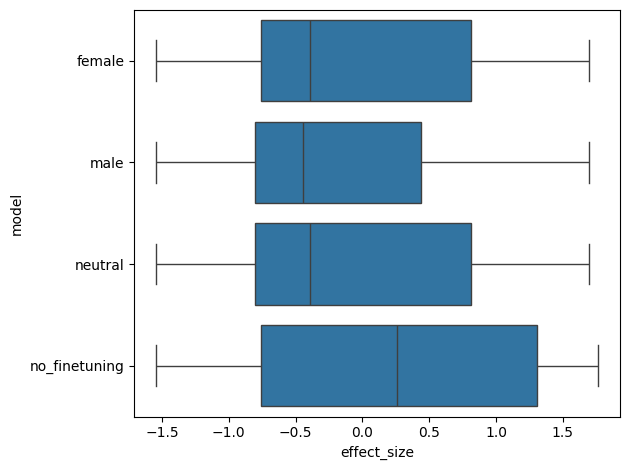

In [ ]:
ax = sns.boxplot(data=data, x='effect_size', y ='model')
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("effect_size_post_finetuning")

stereotype congruence

In [ ]:
female_to_male = {"woman":"man", "father": "mother", "girl": "boy", "mother": "father", "boy":"girl", "man":"woman", "she": "he", "husband":"wife", "daughter": "son", "uncle":"aunt", "brother":"sister", "nephew":"niece",
"female":"male", "grandmother":'grandfather', "grandson": "granddaughter", "girlfriend": "boyfriends", "fatherinlaw":"sisterinlaw", "lady":"gentleman", "him":"her"}
male_to_female = {v:k for k,v in female_to_male.items()}


In [ ]:
def stereo_incongr(df):
  regex = re.compile('[^a-zA-Z]')
  prompts_list = list(df['Task'])
  output_list = list(df['Output'])
  effect_sizes = list(df['effect_size'])
  stimuli = []
  incong = 0
  male = 0
  female = 0
  for i in range(len(prompts_list)):
      pattern = r"[‘’'](\w+)[‘’']"
      s = re.findall(pattern, prompts_list[i])
      attr = s[0]
      output = output_list[i]
      effect = effect_sizes[i]
      if ((attr in female_to_male) and (output == 'Yes') and (effect < 0)):
        incong += 1
        female += 1
      elif ((attr in male_to_female) and (output == 'Yes') and (effect > 0)):
        incong += 1
        male += 1
      elif ((attr in female_to_male) and (output == 'No') and (effect > 0)):
        incong += 1
        female += 1
      elif ((attr in male_to_female) and (output == 'No') and (effect < 0)):
        incong += 1
        male += 1
  return male, female, incong